# Week 12 handin

## 01 Assignment 
1. Take a picture of an apple and put it in the image folder in the notebook environment
2. Find the contour of the apple
3. Draw a yellow circle with the center placed on the center of the apple contour
4. Draw a square that precisely holds the apple
5. Take a picture of three seperate apples.
6. Use contours to programmatically identify the number of apples in the photo

## 02 Status
Kunne ikke finde ud af at tælle tre æbler ud fra deres contour

## 03 Solution

In [24]:
#Take a picture of an apple and put it in the image folder in the notebook environment

import cv2
import numpy as np
from matplotlib import pyplot as plt

img_loc = "images/applee.jpg"


(2600, 2880, 3)
(2600, 2880)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


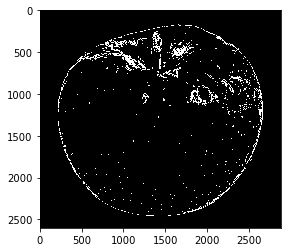

In [12]:
#Find the contour of the apple

# 1
img = cv2.imread(img_loc, cv2.IMREAD_UNCHANGED)
print(img.shape)
# 2
img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img_grey.shape)
# 3
thresh = 130 # the lower the threshhold the more details we get
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
# 4
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#create an empty image for contours
img_contours = np.zeros(img.shape)
# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (255,255,255), 3)

#save image
cv2.imwrite('data/apple_con.jpg',img_contours) 
plt.imshow(img_contours, interpolation='none')

In [42]:
import cv2 
import numpy as np
img_loc = 'images/applee.jpg'
# 1
img = cv2.imread(img_loc, cv2.IMREAD_UNCHANGED)
print(img.shape)
# 2
img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img_grey.shape)
# 3
thresh = 200 # the lower the threshhold the more details we get
ret3, thresh = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
thresh_inverse = cv2.bitwise_not(thresh)

# ret,thresh_img = cv2.threshold(img_grey, thresh, 100, cv2.THRESH_BINARY)
# 4
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

(2600, 2880, 3)
(2600, 2880)


In [19]:
def read(path, switch_channels=True):
    """Read image pixel data from file
    Args:
    path (string): path to image on disk
    switch_channels (bool): if true changes the channels from bgr to rgb (used by matplotlib)"""
    image = cv2.imread(path)
    if switch_channels:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

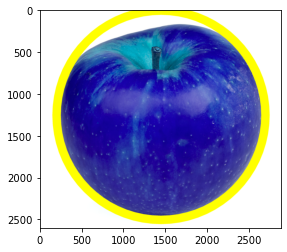

In [34]:
def mark_object(image):
    """find the largest contour in the mask, then use it to compute the minimum enclosing circle and centroid"""
    # Finds contours in a binary image. The contours are a useful tool for shape analysis and object detection and recognition.
    #contours = cv2.con
    #contours = img_contours

    cnts = max(contours, key=cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(cnts)

    # draw the circle and centroid on the frame,
    # then update the list of tracked points
    cv2.circle(image, center=(int(x), int(y)), radius=int(radius), color=(0, 255, 255), thickness=100)
    return image
img = mark_object(read('images/applee.jpg'))
img_converted = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('apple_contours.jpg', img_converted)
plt.imshow(img_converted)

0.0 0.0 (-1, -1) (-1, -1)


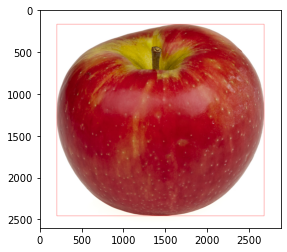

3734
The number of objects in this image:  3734


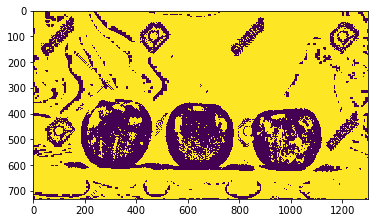

In [110]:
#Take a picture of three seperate apples.
#Use contours to programmatically identify the number of apples in the photo
import cv2
import numpy as np
from matplotlib import pyplot as plt

img_loc = "images/apples.jpg"

import cv2
import numpy as np
img = cv2.imread(img_loc)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,127,255, cv2.THRESH_BINARY)
gaus = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,115,1)
contours,h = cv2.findContours(gaus,1,2)
apples = 0
for cnt in contours:
    apples += 1;
    cv2.drawContours(gaus,[cnt],0,(0,0,255),1)
print(apples)

number_of_objects_in_image= len(contours)

print ("The number of objects in this image: ", str(number_of_objects_in_image))
plt.imshow(gaus, interpolation='none')